# Advertising Sales Channel Prediction

Problem Statement:

    Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
#Importing required libraries.

import pandas as pd
import numpy as np

#importing ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

#importing feature engineering
from sklearn.preprocessing import StandardScaler, LabelEncoder

#importing train test split and #cross validation
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from scipy.stats import zscore

#importing metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error

#importing Machine Learning models
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


We can see that our dataset has a total of 200 rows and 5 columns.

In [3]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


Here we will check the first five rows of our entire dataset. Found that the datatypes are continuous.

The sales column is basically our target variable that we need to predict, Hence this is a Regression problem!

In [4]:
df.sample(3)

,Unnamed: 0,TV,radio,newspaper,sales
135,136,48.3,47.0,8.5,11.6
93,94,250.9,36.5,72.3,22.2
199,200,232.1,8.6,8.7,13.4


Here we have randomly checked 3 sample rows of the dataset.

# Exploratory Data Analysis (EDA)

In [5]:
df.shape

(200, 5)

By looking at column "Unnamed:0", we can say that this column is having no input, it is just the serial numbers and no insights can be extracted from it so first we need to drop it and then check for other parameters.

In [6]:
df['sales'].unique()

array([22.1, 10.4,  9.3, 18.5, 12.9,  7.2, 11.8, 13.2,  4.8, 10.6,  8.6,
       17.4,  9.2,  9.7, 19. , 22.4, 12.5, 24.4, 11.3, 14.6, 18. ,  5.6,
       15.5, 12. , 15. , 15.9, 18.9, 10.5, 21.4, 11.9,  9.6,  9.5, 12.8,
       25.4, 14.7, 10.1, 21.5, 16.6, 17.1, 20.7,  8.5, 14.9, 23.2, 14.8,
       11.4, 10.7, 22.6, 21.2, 20.2, 23.7,  5.5, 23.8, 18.4,  8.1, 24.2,
       15.7, 14. , 13.4, 22.3, 18.3, 12.4,  8.8, 11. , 17. ,  8.7,  6.9,
       14.2,  5.3, 12.3, 13.6, 21.7, 15.2, 16. , 16.7, 11.2,  7.3, 19.4,
       22.2, 11.5, 16.9, 11.7, 17.2, 19.2, 19.8, 21.8, 14.1, 12.6, 12.2,
        9.4,  6.6,  7. , 11.6, 19.7, 24.7,  1.6, 12.7,  5.7, 19.6, 10.8,
       20.8, 10.9, 20.1, 10.3, 16.1, 15.6,  3.2, 15.3, 14.4, 13.3,  8. ,
        8.4, 14.5,  7.6, 27. , 26.2, 17.6, 17.3,  6.7,  9.9,  5.9, 25.5])

We have checked the unique values of our target variable "sales"

In [7]:
#checking the no. of unique values in the target variable:
df['sales'].nunique

<bound method IndexOpsMixin.nunique of 0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64>

In [8]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

Here we have checked if our dataset is having any duplicate values.

In [9]:
#Exploring the data variables:
df.sales.value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: sales, Length: 121, dtype: int64

Lets check the relationship between the variables:

In [10]:
np.corrcoef(df['TV'], df['sales'])

array([[1.        , 0.78222442],
       [0.78222442, 1.        ]])

In [11]:
np.corrcoef(df['radio'], df['sales'])

array([[1.        , 0.57622257],
       [0.57622257, 1.        ]])

In [12]:
np.corrcoef(df['newspaper'], df['sales'])

array([[1.        , 0.22829903],
       [0.22829903, 1.        ]])

Lets check the columns of the dataset

In [13]:
df.columns

Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')

Column Names and their description:
    
    1. Unnamed:0 = Sr.No given to the dataset
    
    2. Tv,radio,newspaper = features of the dataset
    
    3. sales = target variable which needs to be predicted

In [14]:
#Checking Information about the data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


TV, Radio, Newspaper and Sales are floating data columns; unnamed: 0 is integer data type columns.

All are continous/numeric data

In [15]:
#Lets drop unnamed:0 as it is not giving any input
df=df.drop("Unnamed: 0",axis=1)

Dropped the unnamed column as it was not giving any insight over the sales details and was just a numbered data that was basically of no use to us since we have indexing present for our data frame.

In [16]:
# Checking Null Values in our dataset
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

There are no null or missing values in data set

In [17]:
# checking the statistics

df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


We can see that only the newspaper column shows a big difference between it's 75% quantile to it's maximum value while the other two feature columns show reasonable increase between each of their quantiles.

In [18]:
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

1.Using the skew method we can see if there is any skewness in our dataset indicating any kind of outliers.

2.Whether those outliers are genuine or will need to be treated before creating our machine learning model.

3.The acceptable range for skewness is +/-0.5.

4.We can see that our target variable "sales" is the only one within that range and for the rest of the columns we will need to check for further information on them.

# Visualization of data using Distribution plot

<AxesSubplot:xlabel='sales', ylabel='Density'>

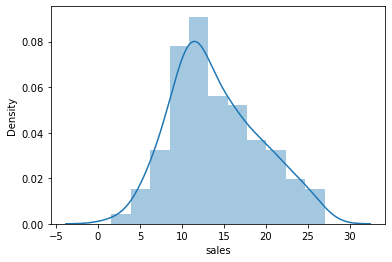

In [19]:
sns.distplot(df['sales'])

<AxesSubplot:xlabel='TV', ylabel='Density'>

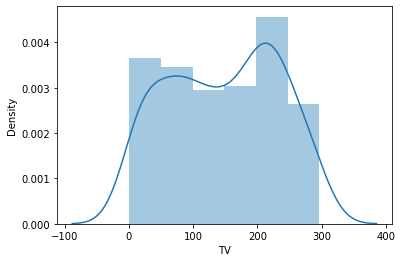

In [20]:
sns.distplot(df['TV'])

<AxesSubplot:xlabel='radio', ylabel='Density'>

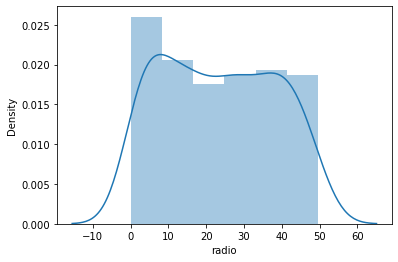

In [21]:
sns.distplot(df['radio'])

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

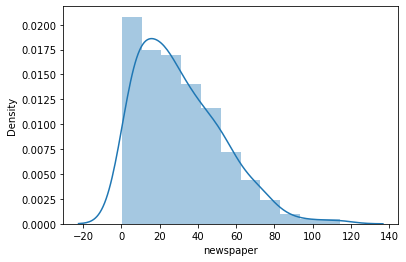

In [22]:
sns.distplot(df['newspaper'])

Looking at the distribution plot, we see that the presence of outliers are affecting the distribution patterns and causing skewness that might need to be treated.

But first we will try to build a model retaining all the data and check whether the model accuracy gets affected due to it or not.

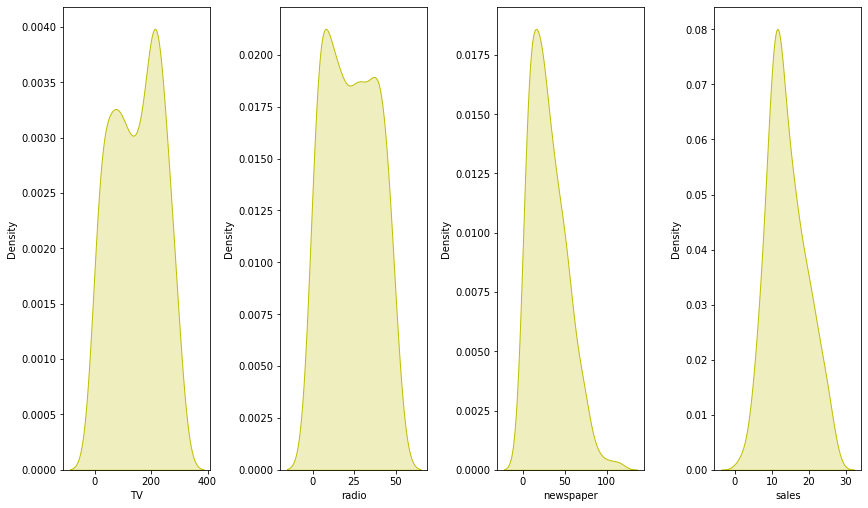

In [23]:
fig, ax = plt.subplots(ncols=4, nrows=1, figsize=(12,7))
index = 0
ax = ax.flatten()
for col, value in df.items():
    sns.distplot(value, ax=ax[index], hist=False, color="y", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

Looking at the above distribution plot we can see that almost all the columns are maintaining the bell shape curve except for the newspaper column where we can see a visible skewness.

# Visualization of data using Pair Plot

<Figure size 1080x720 with 0 Axes>

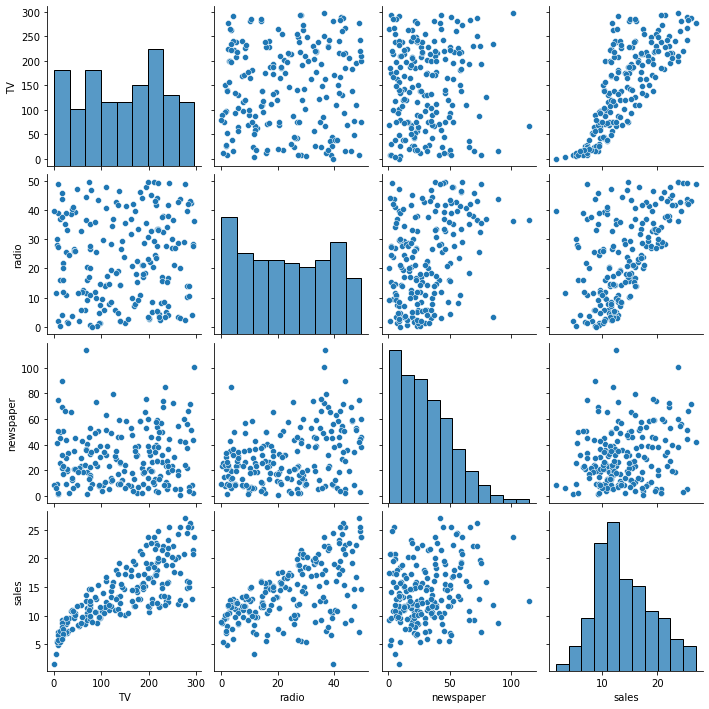

In [24]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.show()

With the help of above pairplot we can see that TV and Radio columns have a linear relationship with Sales. However the Newspaper column is too scattered and we can see an increase with respect to sales but their is no definite linear pattern into it.

# Visualization of data using Box Plot

<AxesSubplot:xlabel='TV'>

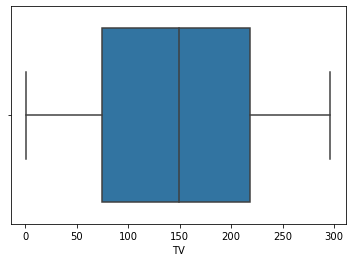

In [25]:
sns.boxplot(df["TV"])

<AxesSubplot:xlabel='radio'>

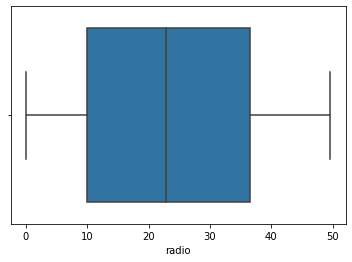

In [26]:
sns.boxplot(df["radio"])

<AxesSubplot:xlabel='newspaper'>

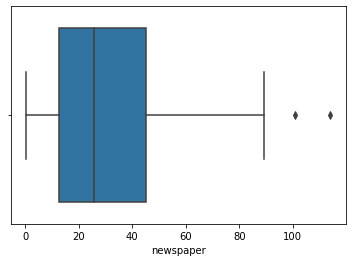

In [27]:
sns.boxplot(df["newspaper"])

<AxesSubplot:xlabel='sales'>

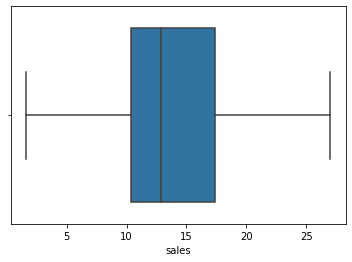

In [28]:
sns.boxplot(df["sales"])

The above boxplot shows that only the newspaper column has 2 outliers which may be genuine or not that will need to be checked and treated if required.

# Visualization of data using Line Plots

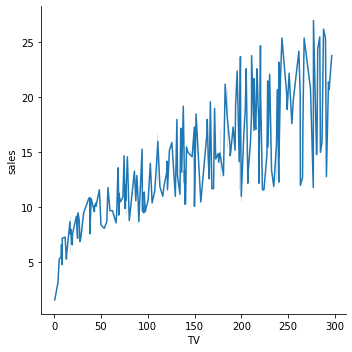

In [29]:
sns.relplot(x="TV", y="sales", kind="line", data=df)

The line plot for TV vs Sales shows a proper increasing pattern wherein the TV advertisements are playing a major role in the marketing field thus inreasing the sales.

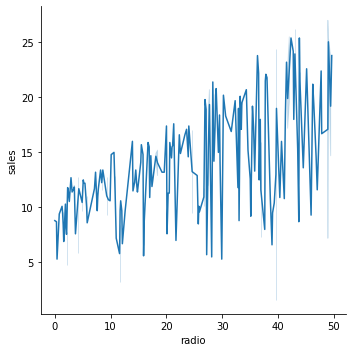

In [30]:
sns.relplot(x="radio", y="sales", kind="line", data=df)

The line plot for Radio vs Sales do not show a dominant relationship when it comes to sales like the TV option but it is definitely contributing towards the sales parameter.

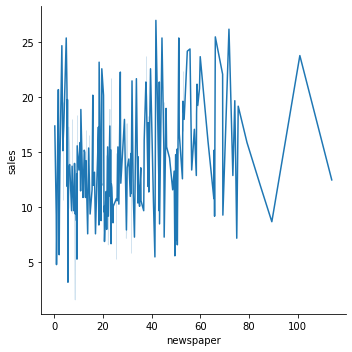

In [31]:
sns.relplot(x="newspaper", y="sales", kind="line", data=df)

Lastly, looking at the line plot for Newspaper vs Sales we see a very random trend where in the beginning the contribution is way better than towards the end showing that the outliers are reflecting in our data are more flukes where in it contributed towards the sales from that mode of marketing.

# Visualization of data using countplot

199.8    2
109.8    2
17.2     2
177.0    2
222.4    2
        ..
139.3    1
216.8    1
199.1    1
26.8     1
232.1    1
Name: TV, Length: 190, dtype: int64


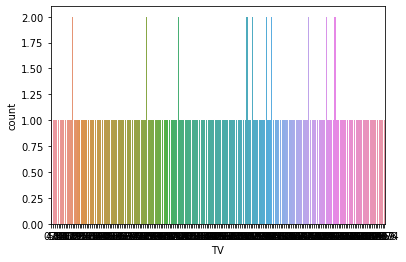

In [32]:
ax = sns.countplot(x="TV",data=df)
print(df["TV"].value_counts())

As per above countplot in case of TV, we can see that most of the data is in the range of 1.00 and very few data is in range of 2.00.

4.1     3
5.7     3
13.9    2
14.3    2
36.9    2
       ..
42.8    1
14.5    1
30.6    1
33.0    1
8.6     1
Name: radio, Length: 167, dtype: int64


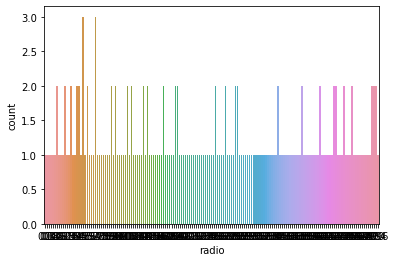

In [33]:
bx = sns.countplot(x="radio",data=df)
print(df["radio"].value_counts())

As per above countplot in case of radio, we can see that most of the data is in range of 1.00, very few in range of 2.00, and least data in range of 3.00.

9.3     3
25.6    3
8.7     3
34.6    2
8.5     2
       ..
27.2    1
31.7    1
19.3    1
31.3    1
66.2    1
Name: newspaper, Length: 172, dtype: int64


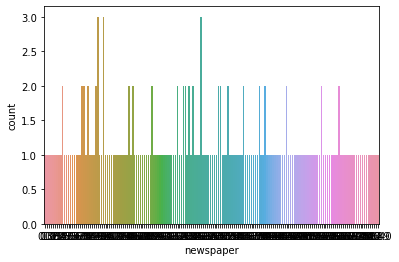

In [34]:
cx = sns.countplot(x="newspaper",data=df)
print(df["newspaper"].value_counts())

As per above countplot in case of newspaper, we can see that most of the data is in range of 1.00, very few in range of 2.00, and least data in range of 3.00.

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: sales, Length: 121, dtype: int64


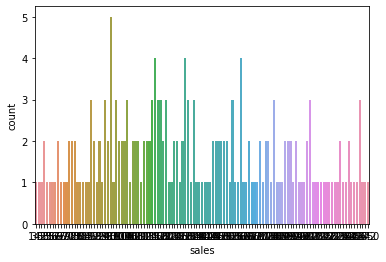

In [35]:
dx = sns.countplot(x="sales",data=df)
print(df["sales"].value_counts())

As per above countplot, in case of our target variable "sales", the data is mostly splitted into the range of 1.00,2.00,3.00 and least data in range of 4.00,5.00

# Visualization of Dataset using Histogram

<AxesSubplot:xlabel='TV', ylabel='Count'>

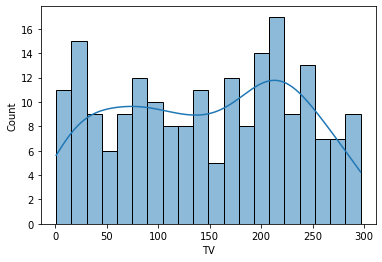

In [36]:
sns.histplot(x='TV',data=df,bins=20,kde=True)

The above graph shows histogram representation of "TV" feature variable

<AxesSubplot:xlabel='radio', ylabel='Count'>

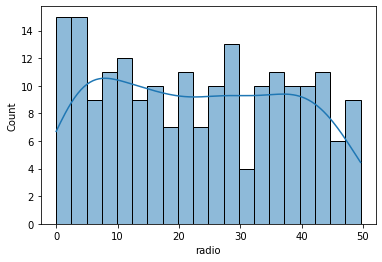

In [37]:
sns.histplot(x='radio',data=df,bins=20,kde=True)

The above graph shows histogram representation of "radio" feature variable

<AxesSubplot:xlabel='newspaper', ylabel='Count'>

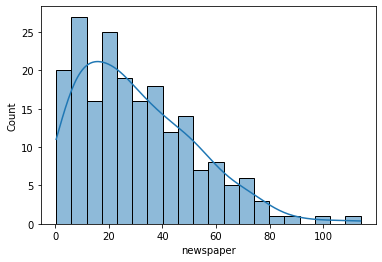

In [38]:
sns.histplot(x='newspaper',data=df,bins=20,kde=True)

The above graph shows histogram representation of "newspaper" feature variable

<AxesSubplot:xlabel='sales', ylabel='Count'>

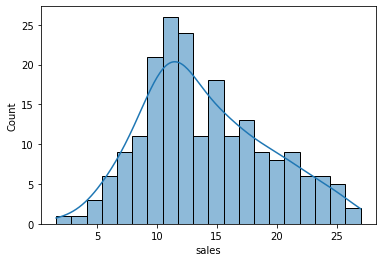

In [39]:
sns.histplot(x='sales',data=df,bins=20,kde=True)

The above graph shows histogram representation of "sales" target variable

# Visualization of Dataset using Violin Plot

<AxesSubplot:xlabel='TV'>

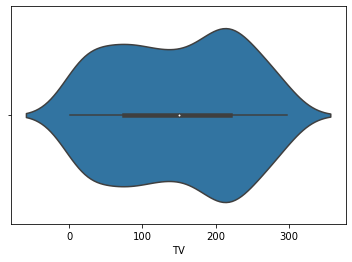

In [40]:
sns.violinplot(x='TV', data=df)

The above graph shows violin plot representation of "TV" with no outliers present.

<AxesSubplot:xlabel='radio'>

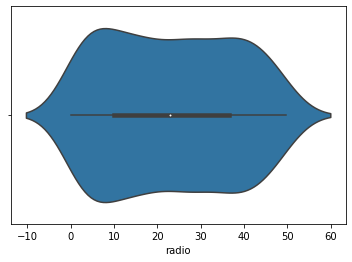

In [41]:
sns.violinplot(x='radio', data=df)

The above graph shows violin plot representation of "radio" with no outliers present.

<AxesSubplot:xlabel='newspaper'>

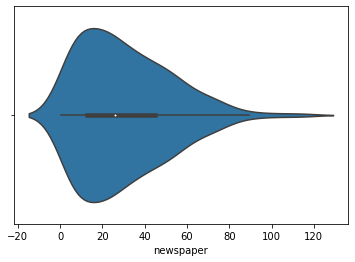

In [42]:
sns.violinplot(x='newspaper', data=df)

As per above violin plot, few outliers are present at 22 to 30, which is affecting our plot and the plot is decreasing 60,80,100.

<AxesSubplot:xlabel='sales'>

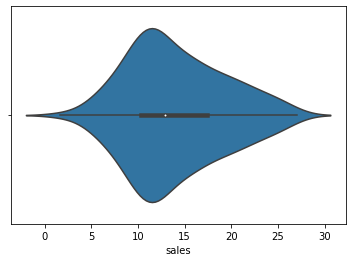

In [43]:
sns.violinplot(x='sales', data=df)

The above graph shows violin plot representation of "sles" with no outliers present.

# Visualization of Dataset using Scatter plot

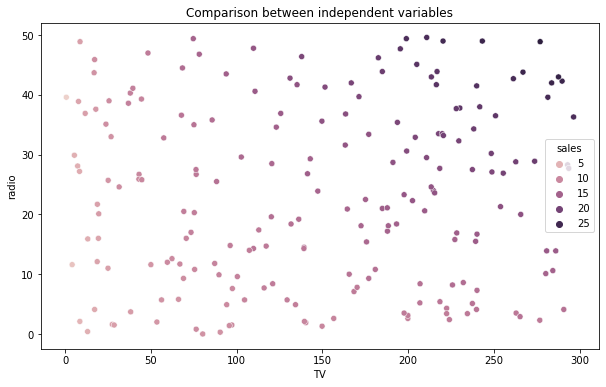

In [44]:
plt.figure(figsize=[10,6])
plt.title('Comparison between independent variables')
sns.scatterplot(df['TV'],df['radio'],hue=df["sales"]);

The above scatterplot reflects the comparison between TV and radio.

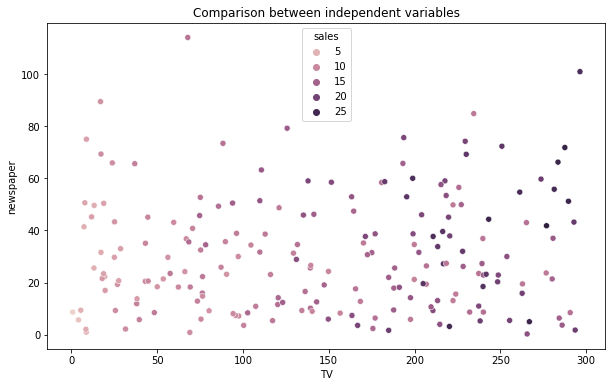

In [45]:
plt.figure(figsize=[10,6])
plt.title('Comparison between independent variables')
sns.scatterplot(df['TV'], df['newspaper'], hue=df["sales"]);

The above scatterplot reflects the comparison between TV and newspaper.

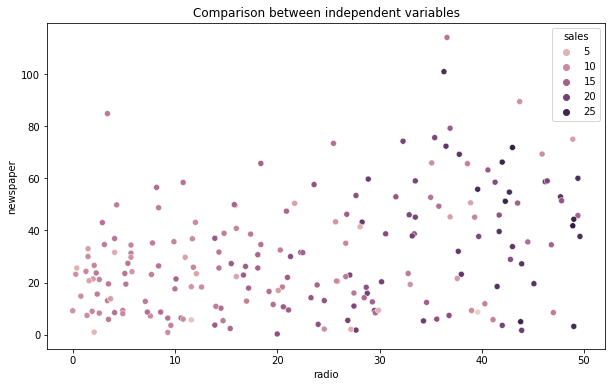

In [46]:
plt.figure(figsize=[10,6])
plt.title('Comparison between independent variables')
sns.scatterplot(df['radio'], df['newspaper'], hue=df["sales"]);

The above scatterplot reflects the comparison betweenb radio and newspaper.

# Correlation using a Heatmap

- Positive correlation - A correlation of +1 indicates a perfect positive correlation, meaning that both variables move in the same direction together.
- Negative correlation - A correlation of –1 indicates a perfect negative correlation, meaning that as one variable goes up, the other goes down.

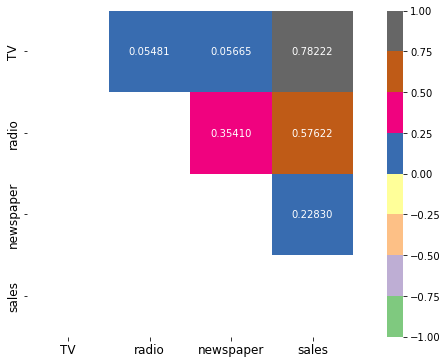

In [47]:
lower_triangle = np.tril(df.corr())
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.5f', 
            annot_kws={'size':10}, cmap="Accent", mask=lower_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In the above heatmap we can see that there are no negative correlation present in between our features and label or between the feature columns either. Noticing the sales part we see that it has a high correlation with TV and a low correlation with Newspaper.

# Checking the correlation :

In [48]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


As per above correlation, we can see that there are no negative correlation present in between our independent variables or either in between target variable and independent variable.
Looking at the sales part we can see that it has a high correlation with TV (0.782) and a low correlation with Newspaper (0.228).

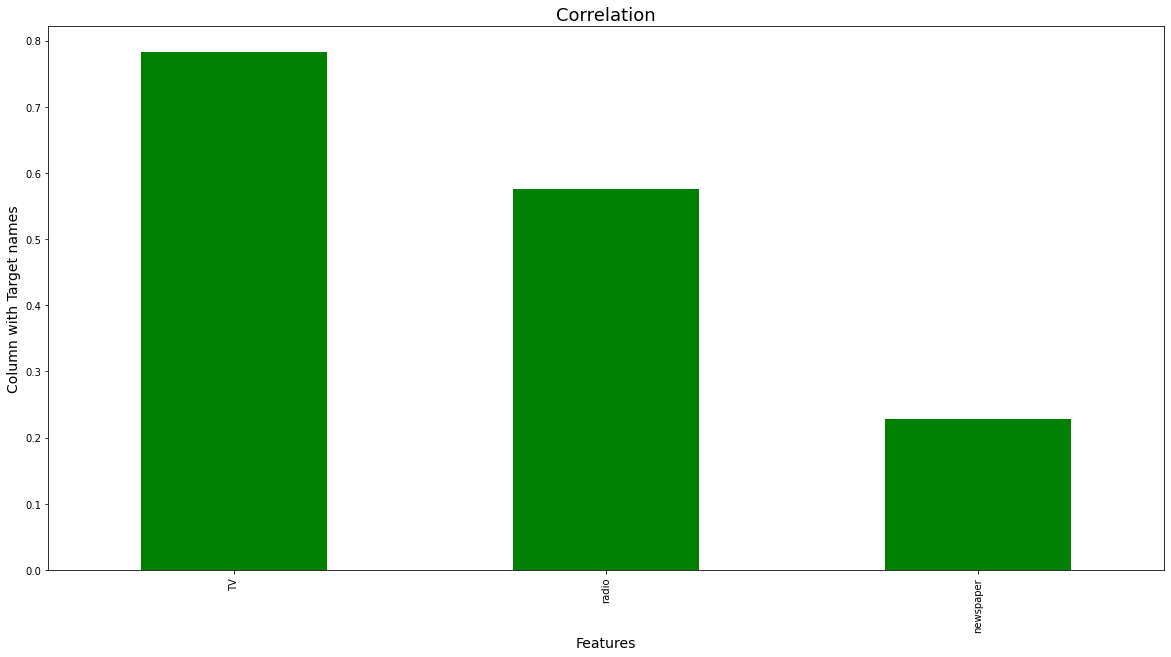

In [49]:
plt.figure(figsize=(20,10))
df.corr()['sales'].sort_values(ascending=False).drop(['sales']).plot(kind='bar',color='g')
plt.xlabel('Features',fontsize=14)
plt.ylabel('Column with Target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

The above figure shows the co-relation of the target variable with other independent variable.

# Removing Outliers using z-score

In [50]:
from scipy.stats import zscore

In [51]:
df.shape

(200, 4)

In [52]:
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([ 16, 101], dtype=int64), array([2, 2], dtype=int64))

In [53]:
df_new=df[(z<3).all(axis=1)]
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


- Percentage Data loss

In [54]:
Data_loss=((200-198)/200)*100
Data_loss

1.0

We can see that our 1% data is lost when we removed the outliers.

# Splitting the dataset into 2 variables namely 'X' and 'Y' for feature and label

In [55]:
X=df.drop('sales',axis=1)
Y=df['sales']

separated the dataset into features and labels where X represents all the feature columns and Y represents the target label column.

# Feature Scaling

In [56]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X # Displaying all the features after applying scaling technique to avoid bias output

,TV,radio,newspaper
0,0.969852,0.981522,1.778945
1,-1.197376,1.082808,0.669579
2,-1.516155,1.528463,1.783549
3,0.052050,1.217855,1.286405
4,0.394182,-0.841614,1.281802
...,...,...,...
195,-1.270941,-1.321031,-0.771217
196,-0.617035,-1.240003,-1.033598
197,0.349810,-0.942899,-1.111852
198,1.594565,1.265121,1.640850


Even though all our feature columns were of float data type there are decimal place differences. 

Therefore by using the Standard Scaler method to ensure that all the feature columns have been standardized.

Note: Trying to retain all the original data therefore not treating the outliers to ensure I do not have any data loss for my model creation.

In [57]:
X.describe()

,TV,radio,newspaper
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.104672e-16,-4.413137e-16,2.220446e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.708823e+00,-1.570868e+00,-1.392646e+00
25%,-8.485295e-01,-8.973206e-01,-8.195504e-01
50%,3.161515e-02,-2.457858e-02,-2.211368e-01
75%,8.381955e-01,8.954299e-01,6.695788e-01
max,1.744029e+00,1.778300e+00,3.841171e+00


Using the describe method we can see the count, mean, standard deviation, minimum, maximum and inter quantile values of our feature data are set.

In [58]:
Y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

# Creating the training and testing data sets

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)

- taking 20 percent of the complete dataset for training purpose and the remaing 80 percent with be used to train the machine learning models

# Machine Learning Model for Regression and Evaluation Metrics

In [64]:
# Regression Model Function

def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

- I have built a function that splits the training and testing features and labels, then trains the model, predicts the label, calculates the RMSE score, generates the R2 score, calculates the Cross Validation score and finally finds the difference between the R2 score and Cross Validation score.

In [66]:
# Linear Regression Model

model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 1.6611334844530619
R2 Score is: 92.20737408493858
Cross Validation Score: 88.71063495438435
R2 Score - Cross Validation Score is 3.496739130554232


- Created the Linear Regression model and checked it's evaluation metrics.

In [67]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 3.6048001995986403
R2 Score is: 63.30244246991666
Cross Validation Score: 72.20715307684598
R2 Score - Cross Validation Score is -8.90471060692932


- Created the Support Vector Regression model and checked it's evaluation metrics.

In [68]:
# Decision Tree Regressor

model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 0.8613942186943212
R2 Score is: 97.90454340950485
Cross Validation Score: 94.54322736724521
R2 Score - Cross Validation Score is 3.361316042259645


- Created the Decision Tree Regressor model and checked it's evaluation metrics.

In [69]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 3.4311334795555855
R2 Score is: 66.75318933674606
Cross Validation Score: 61.72352393104281
R2 Score - Cross Validation Score is 5.029665405703248


- Created the Random Forest Regressor model and checked it's evaluation metrics.

In [70]:
# K Neighbors Regressor

model=KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
reg(model, X, Y)

RMSE Score is: 1.4584880870271106
R2 Score is: 93.99268319933438
Cross Validation Score: 92.90961445942744
R2 Score - Cross Validation Score is 1.0830687399069348


- Created the K Neighbors Regressor model and checked it's evaluation metri

In [71]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 1.1299779026416015
R2 Score is: 96.39409181366375
Cross Validation Score: 93.72330313075821
R2 Score - Cross Validation Score is 2.6707886829055383


- Created the Gradient Boosting Regressor model and checked it's evaluation metrics.

In [72]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 1.163231503781359
R2 Score is: 96.17873572196949
Cross Validation Score: 95.86007140956852
R2 Score - Cross Validation Score is 0.31866431240096915


- Created the Ada Boost Regressor model and checked it's evaluation metrics.

In [73]:
# Extra Trees Regressor

model=ExtraTreesRegressor(n_estimators=200, max_features='sqrt', n_jobs=6)
reg(model, X, Y)

RMSE Score is: 1.5017616342982012
R2 Score is: 93.63091898091479
Cross Validation Score: 93.20599758274446
R2 Score - Cross Validation Score is 0.42492139817032637


- Created the Extra Trees Regressor model and checked it's evaluation metrics.

# Hyperparameter tuning

In [74]:
# Choosing Ada Boost Regressor

fmod_param = {'n_estimators' : [50, 100, 150, 200],
              'learning_rate' : [0.001, 0.01, 0.1, 1],
              'loss' : ["linear", "square", "exponential"],
              'random_state' : [21, 42, 104, 111]
             }

After comparing all the regression models I have selected Ada Boost Regressor as my best model and have listed down it's parameters above referring the sklearn webpage.

In [75]:
GSCV = GridSearchCV(AdaBoostRegressor(), fmod_param, cv=5)

using the Grid Search CV method for hyper parameter tuning my best model.

In [77]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=AdaBoostRegressor(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [50, 100, 150, 200],
                         'random_state': [21, 42, 104, 111]})

trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes

In [78]:
GSCV.best_params_

{'learning_rate': 1,
 'loss': 'linear',
 'n_estimators': 150,
 'random_state': 111}

Here the Grid Search CV has provided me with the best parameters list out of all the combinations it used to train the model

In [79]:
Final_Model = AdaBoostRegressor(learning_rate=1, loss="linear", n_estimators=150, random_state=111)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 96.18348660788863


I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the R2 score for it

# Saving the best model

In [81]:
filename = "FinalModel.pkl"
joblib.dump(Final_Model, filename)

['FinalModel.pkl']

Finally, I am saving my best regression model using the joblib library.

# Checking the multicollinearity using VIF 

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [84]:
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

     feature       VIF
0         TV  1.004611
1      radio  1.144952
2  newspaper  1.145187


- As we can see, TV,radio and newspaper have nearly similar values of VIF, indicating that these variables are nearly correlated. 
- Hence, considering these three features together leads to a model with similar multicollinearity.